In [29]:
%matplotlib inline
import pandas as pd
import numpy as np 
import sklearn
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import LogisticRegression 

path = '/Users/damien/Documents/Sinf/2eme_bis/2eme_quadri/QDA/project_Classification/Select2.csv'
my_db = pd.read_csv(path, sep=';')


In [30]:
my_db.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'fedu',
       'Mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       '0ures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'Passed'],
      dtype='object')

In [31]:
X = my_db.drop('Passed', axis=1)
lm = LinearRegression()
lm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

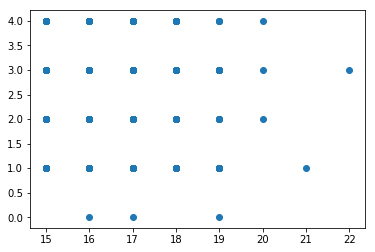

In [32]:
plt.scatter(my_db.age, my_db.Medu)
plt.show()

In [33]:
from sklearn import cross_validation
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X, my_db.Passed,test_size=0.33,random_state=5)
print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

(264, 33)
(264,)
(131, 33)
(131,)


In [34]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [35]:
X = np.array(my_db.drop(['Passed'],1))
Y = np.array(my_db['Passed'])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size = 0.2)
clf = LogisticRegression()
clf.fit(X_train,Y_train)
prediction = clf.predict(X_test)
print(prediction)
print(Y_test)

[1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 0 0 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0
 0 1 1 1 0]
[1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 0 1 1 1 0]


In [38]:
array = clf.predict_proba(X[:395])
print(array)

[[  9.99997316e-01   2.68369042e-06]
 [  9.99853819e-01   1.46181330e-04]
 [  1.23117150e-02   9.87688285e-01]
 [  1.84436512e-08   9.99999982e-01]
 [  4.32319406e-02   9.56768059e-01]
 [  3.46528278e-08   9.99999965e-01]
 [  2.95752051e-03   9.97042479e-01]
 [  9.99962446e-01   3.75535829e-05]
 [  5.55111512e-15   1.00000000e+00]
 [  1.78515497e-08   9.99999982e-01]
 [  2.48459612e-01   7.51540388e-01]
 [  1.21390589e-05   9.99987861e-01]
 [  7.01810301e-08   9.99999930e-01]
 [  4.27528346e-04   9.99572472e-01]
 [  1.10203180e-10   1.00000000e+00]
 [  5.26427314e-07   9.99999474e-01]
 [  1.13060979e-06   9.99998869e-01]
 [  7.12111682e-02   9.28788832e-01]
 [  9.99999639e-01   3.60564750e-07]
 [  2.28613991e-02   9.77138601e-01]
 [  6.59306498e-09   9.99999993e-01]
 [  5.98142669e-09   9.99999994e-01]
 [  1.92324734e-09   9.99999998e-01]
 [  5.45392128e-05   9.99945461e-01]
 [  9.49990943e-01   5.00090569e-02]
 [  9.00020131e-01   9.99798688e-02]
 [  6.88175966e-05   9.99931182e-01]
 

In [39]:
print(array[0][0])

0.99999731631


In [40]:
print(array[0][1])

2.68369041783e-06


In [ ]:
import xlrd
 
from xlwt import Workbook, Formula
path = path = '/Users/damien/Documents/Sinf/2eme_bis/2eme_quadri/QDA/project_Classification'
classeur = Workbook()
feuille = classeur.add_sheet("try", cell_overwrite_ok=True)
 
i = 0
while i < 395:
    feuille.write(i, 3, array[i][0])
    feuille.write(i, 4, array[i][1])

classeur.save(path)